<a href="https://colab.research.google.com/github/NanaBeta/NanaBeta/blob/main/HUBBLEMIND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Set display options
pd.set_option('display.max_columns', None)
#plt.style.use('seaborn')


In [ ]:


# Load the CSV file
df = pd.read_csv("/content/drive/Othercomputers/My PC/Documents/in-vehicle-coupon-recommendation.csv")


# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample of first few rows:")
display(df.head())
print("\nData Info:")
display(df.info())


Dataset Shape: (12684, 26)

Columns: ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']

Sample of first few rows:


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12

None

In [ ]:
# Function to identify and remove columns with high missing values
def drop_unnecessary_columns(df):
    threshold = 50  # Set threshold for missing values at 50%
    missing_percentages = (df.isnull().sum() / len(df)) * 100
    columns_to_drop = missing_percentages[missing_percentages > threshold].index
    print(f"Dropping columns: {columns_to_drop.tolist()}")
    return df.drop(columns=columns_to_drop)

df = drop_unnecessary_columns(df)
display(df.info())

Dropping columns: ['car']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHous

None

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define numerical features for preprocessing
numerical_columns = [
    'temperature', 'has_children', 'toCoupon_GEQ5min',
    'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
    'direction_same', 'direction_opp'
]

# Define categorical features for preprocessing
categorical_columns = [
    'destination', 'passanger', 'weather', 'time',
    'coupon', 'expiration', 'gender', 'age',
    'maritalStatus', 'education', 'occupation',
    'income', 'Bar', 'CoffeeHouse',
    'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'
]

def clean_data(df):
    # Create a copy to avoid modifying original data
    df_clean = df.copy()

    # Fill missing values in numerical columns with median
    for col in numerical_columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

    # Fill missing values in categorical columns with mode
    for col in categorical_columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

    # Define columns that represent frequency
    frequency_columns = ['Bar', 'CoffeeHouse', 'CarryAway',
                        'RestaurantLessThan20', 'Restaurant20To50']

    # Map text-based frequency values to numerical values
    frequency_mapping = {
        'never': '0',
        'less1': '1',
        '1~3': '2',
        '4~8': '3',
        'gt8': '4'
    }

    # Convert frequency columns to numerical values
    for col in frequency_columns:
        df_clean[col] = df_clean[col].map(frequency_mapping)
        df_clean[col] = df_clean[col].astype(int)

    return df_clean

# Apply data cleaning
df_cleaned = clean_data(df)

# Initialize transformers for numerical and categorical data
numeric_transformer = StandardScaler()  # Standardize numerical features
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)  # One-hot encode categorical features

# Combine transformers into a single preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Separate features (X) and target variable (y)
X = df_cleaned.drop('Y', axis=1)
y = df_cleaned['Y']

# Apply preprocessing transformations
X_transformed = preprocessor.fit_transform(X)

# Generate feature names for transformed dataset
feature_names = (numerical_columns +
                preprocessor.named_transformers_['cat']
                .get_feature_names_out(categorical_columns).tolist())

# Create final transformed dataframe
X_transformed_df = pd.DataFrame(
    X_transformed,
    columns=feature_names
)

# Save transformed data to CSV
output_file_path = "transformed_features.csv"
X_transformed_df.to_csv(output_file_path, index=False)

# Display shape information
print("Original shape:", X.shape)
print("Transformed shape:", X_transformed_df.shape)
print(f"Transformed features saved to: {output_file_path}")


Original shape: (12684, 24)
Transformed shape: (12684, 92)


WEEK 2

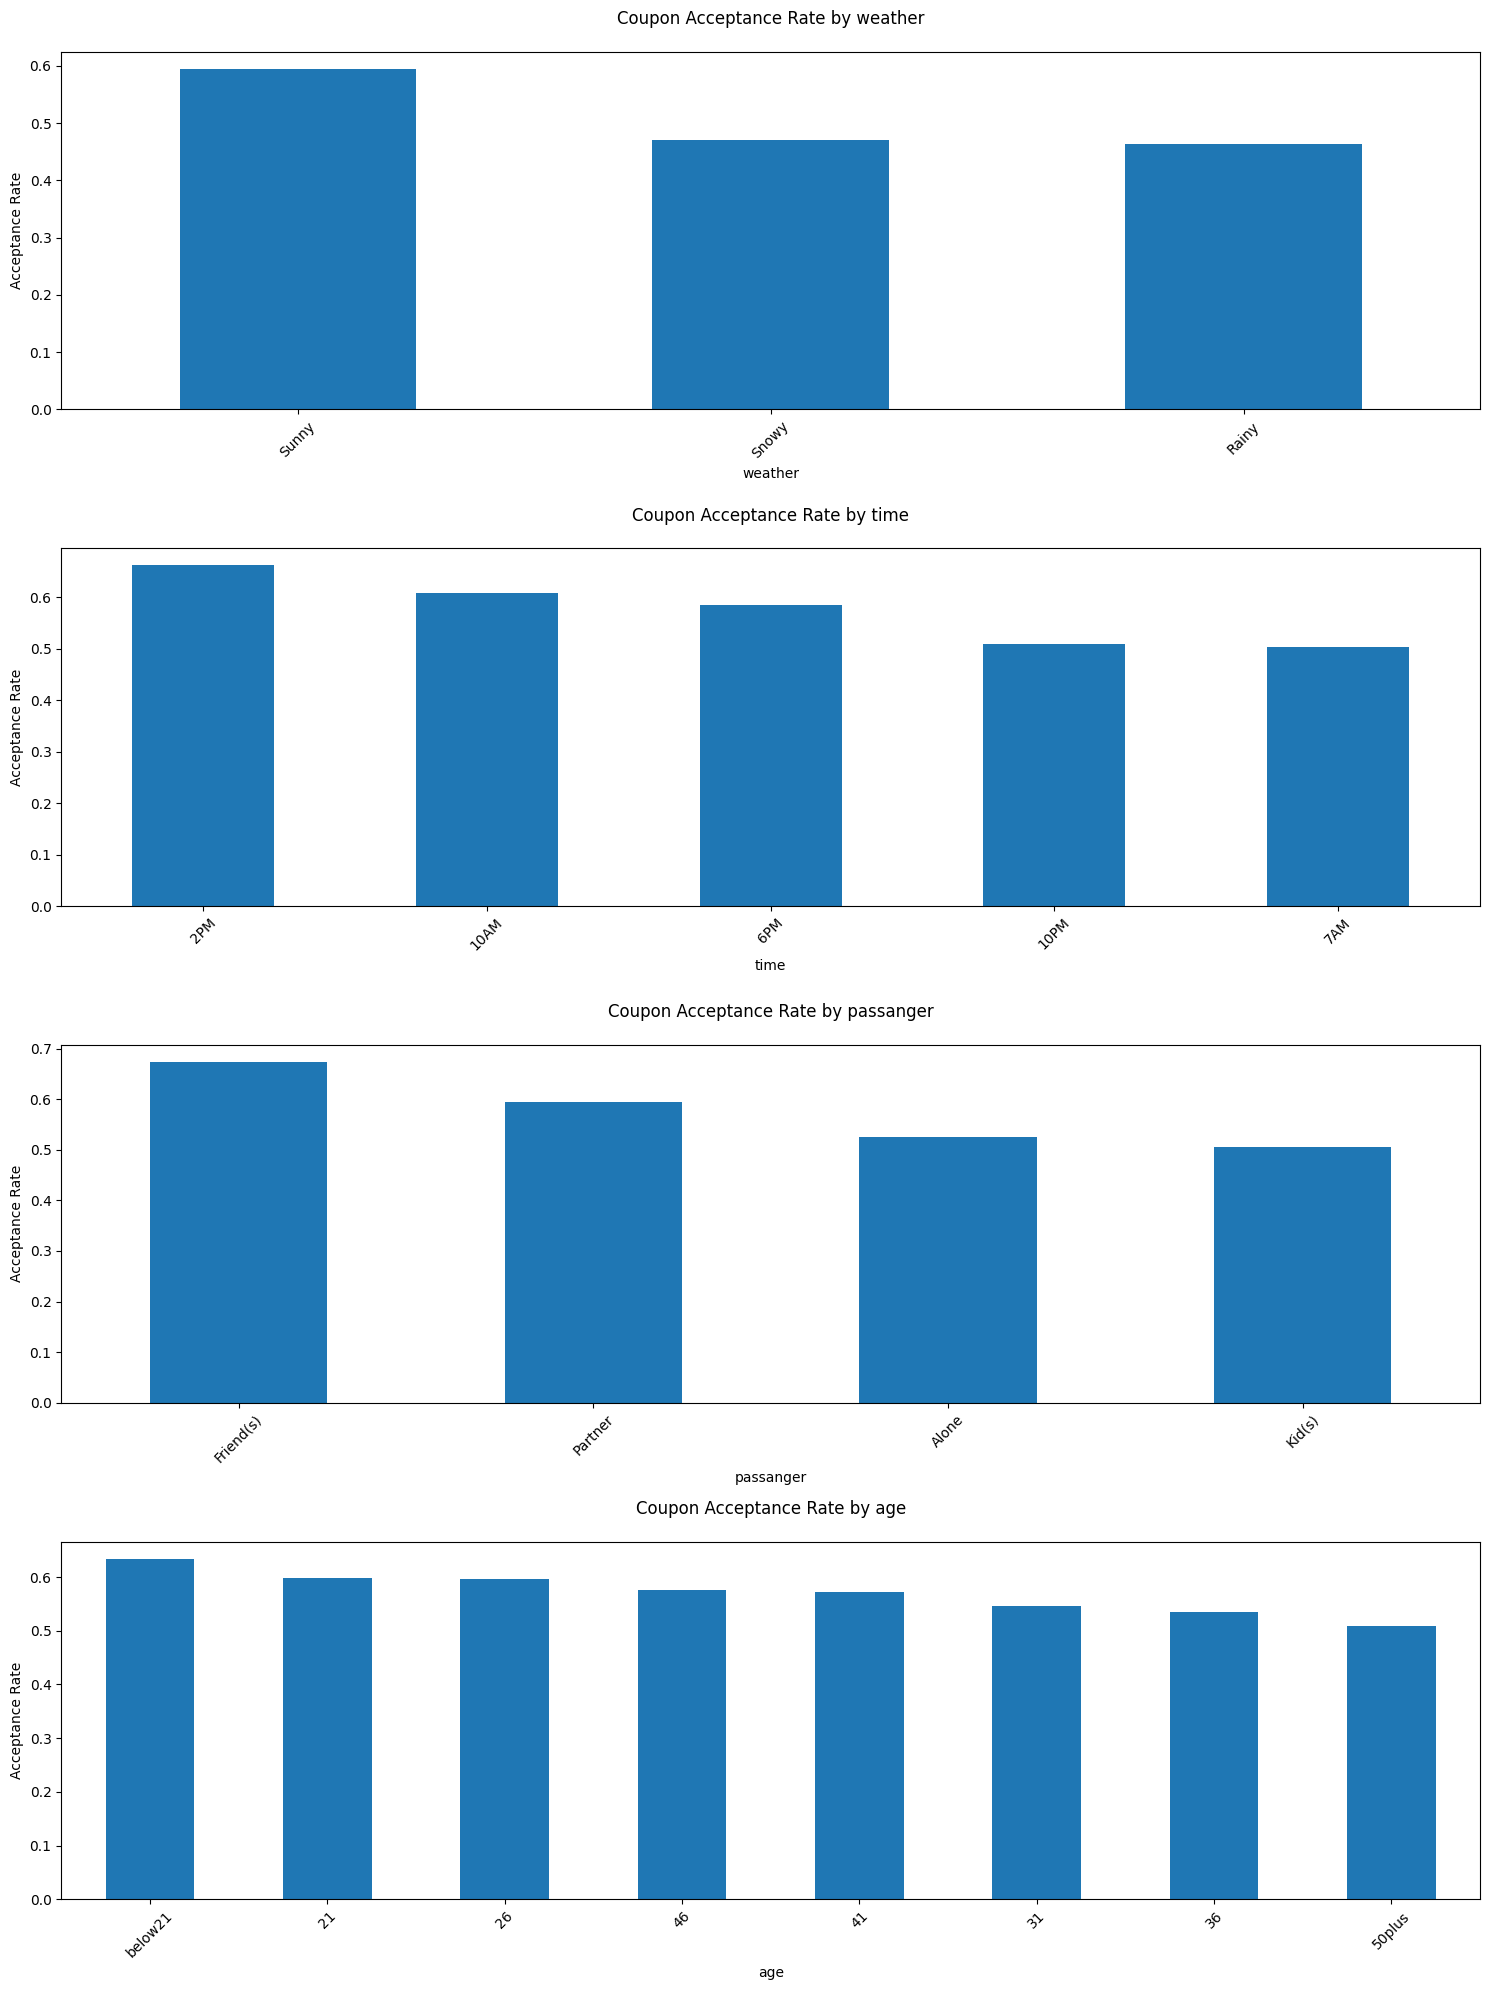

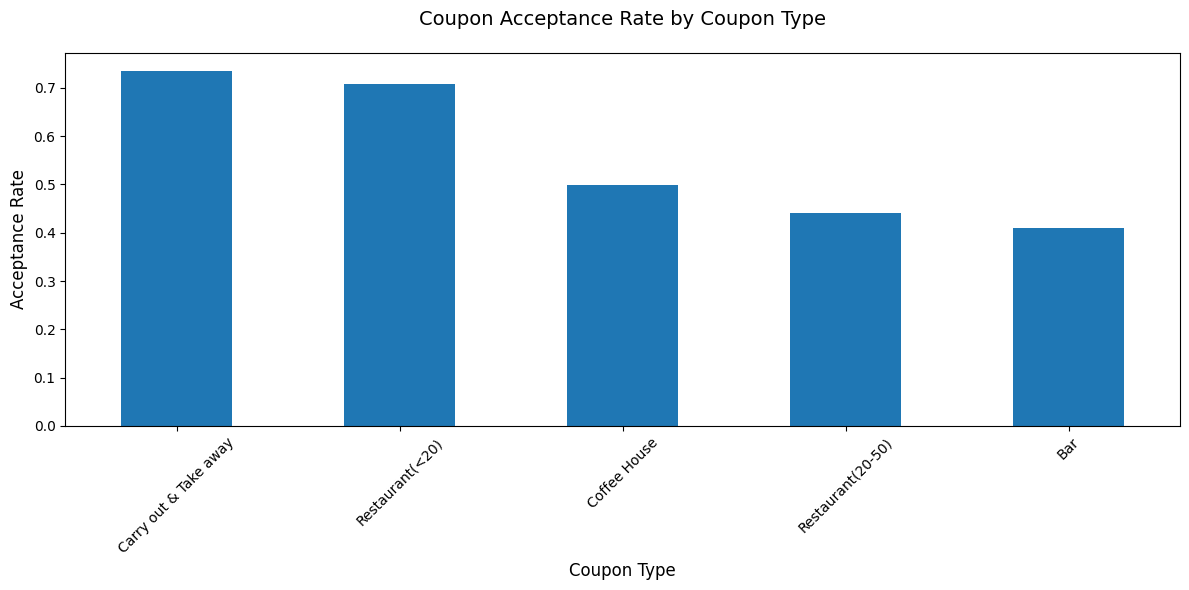


Detailed Coupon Statistics:
                           mean  count   sum
coupon                                      
Bar                    0.410015   2017   827
Carry out & Take away  0.735478   2393  1760
Coffee House           0.499249   3996  1995
Restaurant(20-50)      0.441019   1492   658
Restaurant(<20)        0.707107   2786  1970


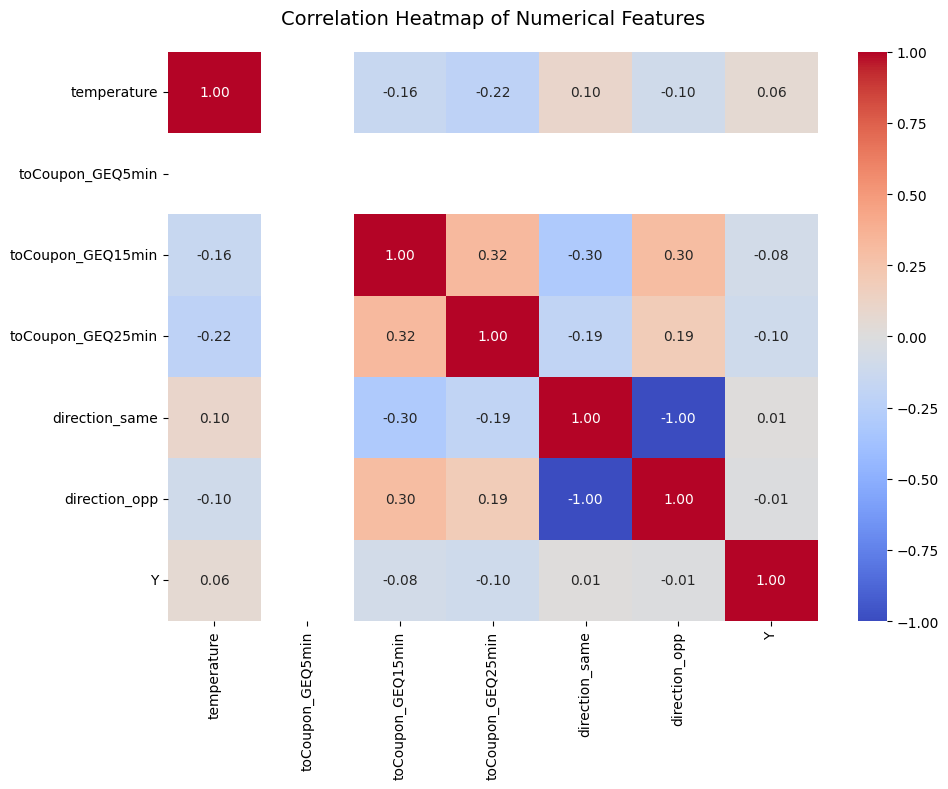

<ipython-input-6-f79b14bc3571>:89: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df['Y']==1][feature],
<ipython-input-6-f79b14bc3571>:93: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df['Y']==0][feature],


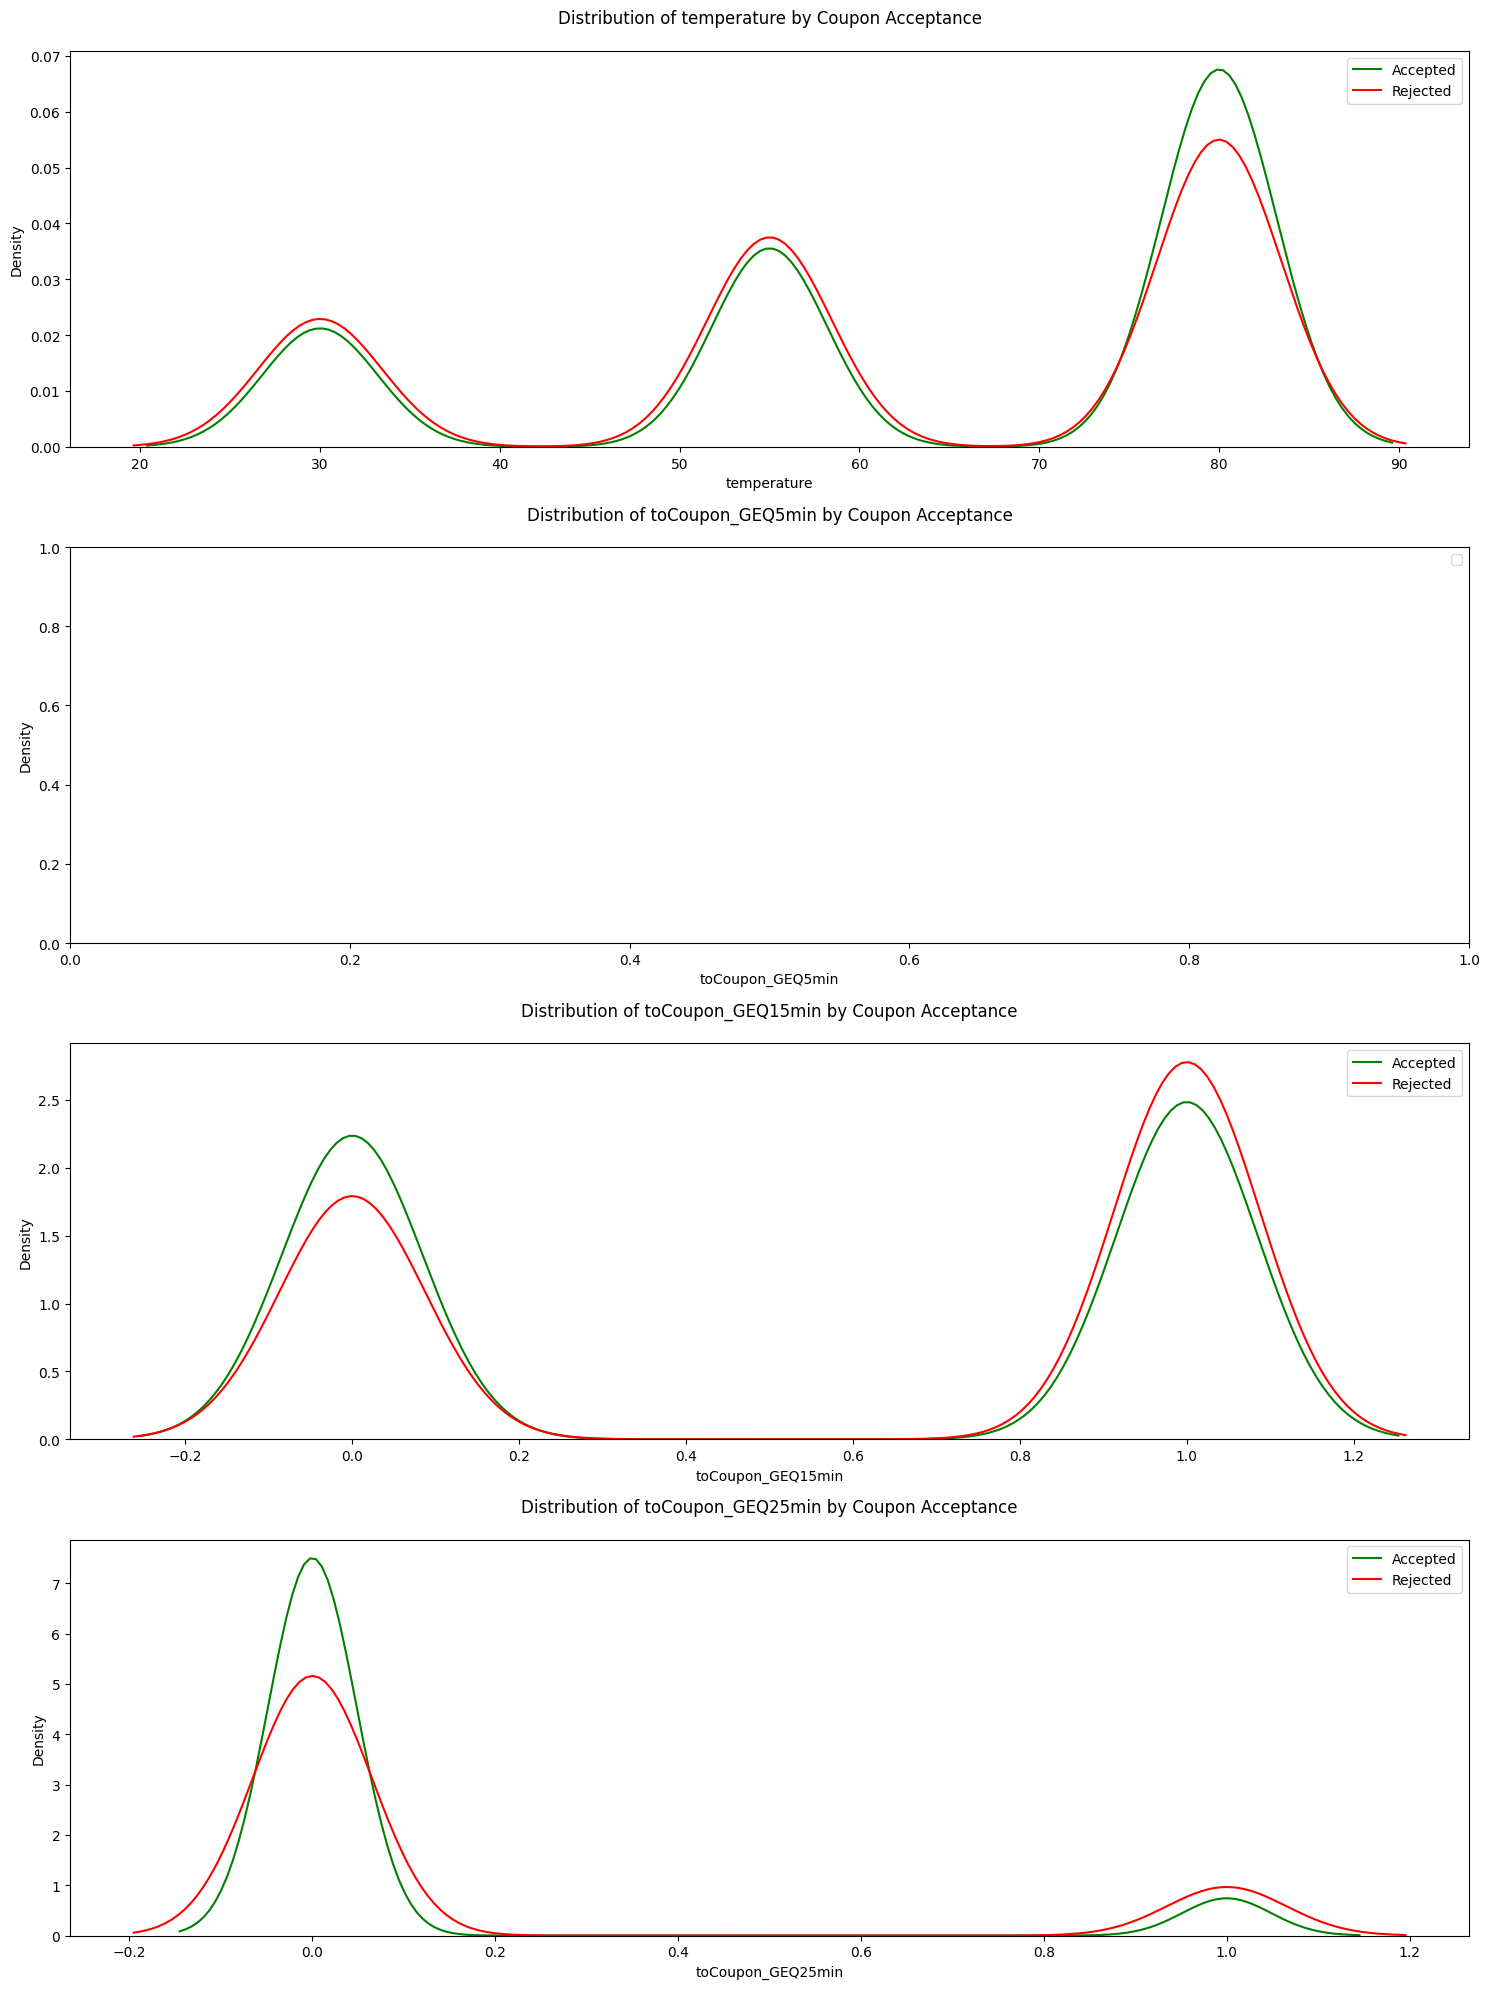


Key Statistical Insights:
1. Acceptance rates by category:

weather acceptance rates:
weather
Sunny    0.594796
Snowy    0.470463
Rainy    0.462810
Name: Y, dtype: float64

time acceptance rates:
time
2PM     0.661523
10AM    0.608352
6PM     0.584520
10PM    0.508475
7AM     0.502212
Name: Y, dtype: float64

passanger acceptance rates:
passanger
Friend(s)    0.673438
Partner      0.595349
Alone        0.525804
Kid(s)       0.504970
Name: Y, dtype: float64

age acceptance rates:
age
below21    0.634369
21         0.598191
26         0.595936
46         0.575802
41         0.572736
31         0.546346
36         0.535254
50plus     0.508949
Name: Y, dtype: float64

2. Overall coupon acceptance rate: 56.84%

3. Numerical Feature Statistics:
        temperature  toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min
count  12684.000000           12684.0       12684.000000       12684.000000
mean      63.301798               1.0           0.561495           0.119126
std       19.154486   

In [ ]:
# Import required libraries for visualization and analysis
import matplotlib.pyplot as plt
import seaborn as sns

###########################################
# 1. CATEGORICAL FEATURE VISUALIZATION
###########################################
def plot_categorical_relationships(df, categorical_features):
    # Create a figure with subplots for each categorical feature
    # Size is adjusted based on number of features (15 width, 5 height per feature)
    plt.figure(figsize=(15, len(categorical_features)*5))

    # Loop through each categorical feature to create individual plots
    for idx, feature in enumerate(categorical_features, 1):
        plt.subplot(len(categorical_features), 1, idx)
        # Calculate acceptance rate for each category
        acceptance_rates = df.groupby(feature)['Y'].mean().sort_values(ascending=False)
        # Create bar plot
        acceptance_rates.plot(kind='bar')
        # Add labels and titles
        plt.title(f'Coupon Acceptance Rate by {feature}', fontsize=12, pad=20)
        plt.xlabel(feature, fontsize=10)
        plt.ylabel('Acceptance Rate', fontsize=10)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

###########################################
# 2. COUPON TREND ANALYSIS
###########################################
def analyze_coupon_trends(df):
    # Create figure for coupon type analysis
    plt.figure(figsize=(12, 6))
    # Calculate and sort acceptance rates by coupon type
    coupon_acceptance = df.groupby('coupon')['Y'].mean().sort_values(ascending=False)
    # Create bar plot
    coupon_acceptance.plot(kind='bar')
    # Add labels and title
    plt.title('Coupon Acceptance Rate by Coupon Type', fontsize=14, pad=20)
    plt.xlabel('Coupon Type', fontsize=12)
    plt.ylabel('Acceptance Rate', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Print detailed statistics
    print("\nDetailed Coupon Statistics:")
    print(df.groupby('coupon')['Y'].agg(['mean', 'count', 'sum']))

###########################################
# 3. NUMERICAL CORRELATION ANALYSIS
###########################################
def plot_correlation_heatmap(df):
    # Select numerical columns for correlation analysis
    numerical_cols = ['temperature', 'toCoupon_GEQ5min',
                     'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
                     'direction_same', 'direction_opp', 'Y']

    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()

    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix,
                annot=True,          # Show correlation values
                cmap='coolwarm',     # Color scheme
                center=0,            # Center the colormap at 0
                fmt='.2f')           # Format correlation values to 2 decimal places
    plt.title('Correlation Heatmap of Numerical Features', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

###########################################
# 4. NUMERICAL DISTRIBUTIONS VISUALIZATION
###########################################
def plot_numerical_distributions(df):
    # Select numerical features for distribution analysis
    numerical_features = ['temperature', 'toCoupon_GEQ5min',
                         'toCoupon_GEQ15min', 'toCoupon_GEQ25min']

    # Create subplots for each numerical feature
    plt.figure(figsize=(15, len(numerical_features)*5))

    for idx, feature in enumerate(numerical_features, 1):
        plt.subplot(len(numerical_features), 1, idx)

        # Plot distribution for accepted coupons
        sns.kdeplot(data=df[df['Y']==1][feature],
                   label='Accepted',
                   color='green')
        # Plot distribution for rejected coupons
        sns.kdeplot(data=df[df['Y']==0][feature],
                   label='Rejected',
                   color='red')

        # Add labels and title
        plt.title(f'Distribution of {feature} by Coupon Acceptance', fontsize=12, pad=20)
        plt.xlabel(feature, fontsize=10)
        plt.ylabel('Density', fontsize=10)
        plt.legend()

    plt.tight_layout()
    plt.show()

###########################################
# EXECUTE ALL ANALYSES
###########################################
# Define key categorical features for analysis
key_categorical_features = ['weather', 'time', 'passanger', 'age']

# Run all visualizations
plot_categorical_relationships(df, key_categorical_features)
analyze_coupon_trends(df)
plot_correlation_heatmap(df)
plot_numerical_distributions(df)

###########################################
# SUMMARY STATISTICS
###########################################
print("\nKey Statistical Insights:")
print("1. Acceptance rates by category:")
for feature in key_categorical_features:
    print(f"\n{feature} acceptance rates:")
    print(df.groupby(feature)['Y'].mean().sort_values(ascending=False))

print("\n2. Overall coupon acceptance rate:",
      f"{df['Y'].mean():.2%}")

# Additional summary statistics for numerical features
print("\n3. Numerical Feature Statistics:")
print(df[['temperature', 'toCoupon_GEQ5min',
          'toCoupon_GEQ15min', 'toCoupon_GEQ25min']].describe())


In [ ]:
# Import additional libraries
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import scipy.stats as stats
from scipy.stats import chi2_contingency

###########################################
# 1. INTERACTIVE VISUALIZATIONS WITH PLOTLY
###########################################
def create_interactive_plots(df):
    # Acceptance rate by time and weather
    fig = px.sunburst(df,
                      path=['time', 'weather'],
                      color='Y',
                      title='Coupon Acceptance Patterns by Time and Weather')
    fig.show()

    # Interactive heatmap of categorical relationships
    pivot_table = pd.pivot_table(df,
                                values='Y',
                                index='time',
                                columns='weather',
                                aggfunc='mean')

    fig = px.imshow(pivot_table,
                    title='Acceptance Rate Heatmap: Time vs Weather',
                    labels=dict(x="Weather", y="Time", color="Acceptance Rate"))
    fig.show()

###########################################
# 2. CROSS-TABULATION ANALYSIS
###########################################
def perform_cross_tabulation(df):
    categorical_pairs = [
        ('weather', 'time'),
        ('passanger', 'weather'),
        ('age', 'time'),
        ('coupon', 'time')
    ]

    for cat1, cat2 in categorical_pairs:
        # Create cross-tabulation
        ctab = pd.crosstab(df[cat1], df[cat2],
                          values=df['Y'],
                          aggfunc='mean')

        print(f"\nCross-tabulation of {cat1} vs {cat2} (Acceptance Rates):")
        print(ctab)

        # Perform chi-square test
        chi2, p_value, _, _ = chi2_contingency(pd.crosstab(df[cat1], df[cat2]))
        print(f"\nChi-square test results:")
        print(f"Chi-square statistic: {chi2:.2f}")
        print(f"p-value: {p_value:.4f}")

###########################################
# 3. STATISTICAL TESTS
###########################################
def perform_statistical_tests(df):
    # T-test for temperature between accepted and rejected coupons
    accepted_temp = df[df['Y'] == 1]['temperature']
    rejected_temp = df[df['Y'] == 0]['temperature']
    t_stat, p_value = stats.ttest_ind(accepted_temp, rejected_temp)

    print("\nTemperature T-Test Results:")
    print(f"t-statistic: {t_stat:.2f}")
    print(f"p-value: {p_value:.4f}")

    # ANOVA test for categorical variables
    for category in ['weather', 'time', 'passanger']:
        groups = [group['temperature'].values for name, group in df.groupby(category)]
        f_stat, p_value = stats.f_oneway(*groups)
        print(f"\nANOVA Test for {category}:")
        print(f"F-statistic: {f_stat:.2f}")
        print(f"p-value: {p_value:.4f}")

###########################################
# 4. TIME-BASED ANALYSIS
###########################################
def analyze_time_patterns(df):
    # Create a mapping for time periods to hours (24-hour format)
    time_mapping = {
        '10AM': 10, '2PM': 14, '6PM': 18, '7AM': 7,
        '10PM': 22, '6AM': 6, '2AM': 2
    }

    # Convert time periods to hours
    df['hour'] = df['time'].map(time_mapping)

    # Create hourly acceptance rate visualization
    hourly_rates = df.groupby('hour')['Y'].mean().reset_index()

    # Plotly line plot for hourly acceptance rates
    fig = px.line(hourly_rates,
                  x='hour',
                  y='Y',
                  title='Hourly Coupon Acceptance Rate',
                  labels={'Y': 'Acceptance Rate', 'hour': 'Hour of Day'})
    fig.update_layout(xaxis_title="Hour of Day",
                     yaxis_title="Acceptance Rate")
    fig.show()

    # Time-based patterns by coupon type
    pivot_time_coupon = pd.pivot_table(df,
                                      values='Y',
                                      index='hour',
                                      columns='coupon',
                                      aggfunc='mean')

    # Plotly line plot for coupon types over time
    fig = px.line(pivot_time_coupon,
                  title='Coupon Type Acceptance Rate by Hour')
    fig.update_layout(xaxis_title="Hour of Day",
                     yaxis_title="Acceptance Rate",
                     legend_title="Coupon Type")
    fig.show()

    # Print time-based insights
    print("\nTime-based Analysis Insights:")
    print("Peak acceptance hours:",
          hourly_rates.nlargest(3, 'Y')[['hour', 'Y']].to_string())
    print("\nLowest acceptance hours:",
          hourly_rates.nsmallest(3, 'Y')[['hour', 'Y']].to_string())

# Execute all analyses with the fixed time pattern analysis
create_interactive_plots(df)
perform_cross_tabulation(df)
perform_statistical_tests(df)
analyze_time_patterns(df)


# Print overall summary
print("\nAnalysis Summary:")
print("1. Interactive visualizations show patterns in acceptance rates")
print("2. Cross-tabulation reveals relationships between categorical variables")
print("3. Statistical tests validate the significance of observed patterns")
print("4. Time-based analysis identifies optimal coupon distribution times")



Cross-tabulation of weather vs time (Acceptance Rates):
time         10AM      10PM       2PM       6PM       7AM
weather                                                  
Rainy    0.562791  0.370504  0.632353  0.558036  0.395294
Snowy    0.750000  0.369898  0.535545  0.335404  0.480573
Sunny    0.602201  0.577844  0.678035  0.600703  0.527111

Chi-square test results:
Chi-square statistic: 641.82
p-value: 0.0000

Cross-tabulation of passanger vs weather (Acceptance Rates):
weather       Rainy     Snowy     Sunny
passanger                              
Alone      0.433213  0.407480  0.561927
Friend(s)  0.489655  0.756757  0.675190
Kid(s)     0.538462  0.227273  0.523202
Partner    0.557692  0.562500  0.604678

Chi-square test results:
Chi-square statistic: 330.46
p-value: 0.0000

Cross-tabulation of age vs time (Acceptance Rates):
time         10AM      10PM       2PM       6PM       7AM
age                                                      
21       0.640592  0.541026  0.693735  0


Time-based Analysis Insights:
Peak acceptance hours:    hour         Y
2    14  0.661523
1    10  0.608352
3    18  0.584520

Lowest acceptance hours:    hour         Y
0     7  0.502212
4    22  0.508475
3    18  0.584520

Analysis Summary:
1. Interactive visualizations show patterns in acceptance rates
2. Cross-tabulation reveals relationships between categorical variables
3. Statistical tests validate the significance of observed patterns
4. Time-based analysis identifies optimal coupon distribution times


WEEK 3: ML MODEL TRAINING



Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.56      0.61      1128
           1       0.69      0.78      0.73      1409

    accuracy                           0.68      2537
   macro avg       0.68      0.67      0.67      2537
weighted avg       0.68      0.68      0.68      2537



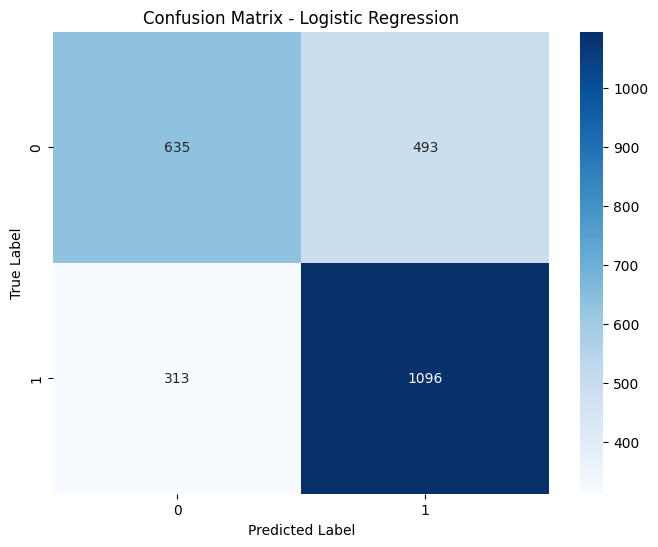


Training Decision Tree...

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1128
           1       0.70      0.73      0.72      1409

    accuracy                           0.68      2537
   macro avg       0.67      0.67      0.67      2537
weighted avg       0.68      0.68      0.68      2537



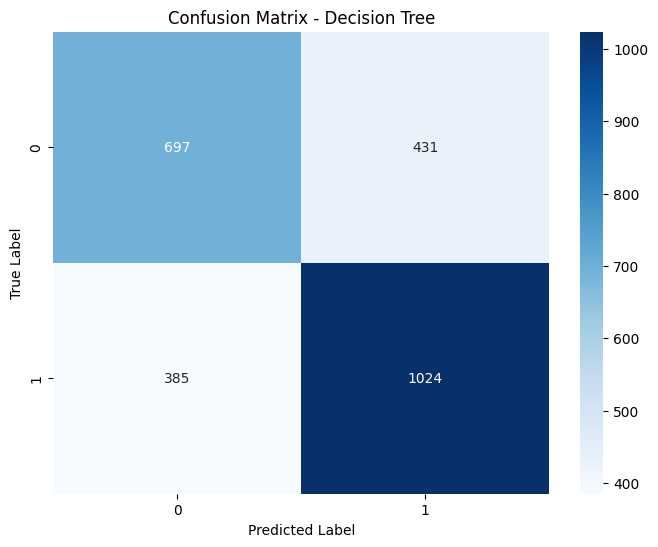


Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.68      1128
           1       0.74      0.82      0.78      1409

    accuracy                           0.74      2537
   macro avg       0.74      0.73      0.73      2537
weighted avg       0.74      0.74      0.73      2537



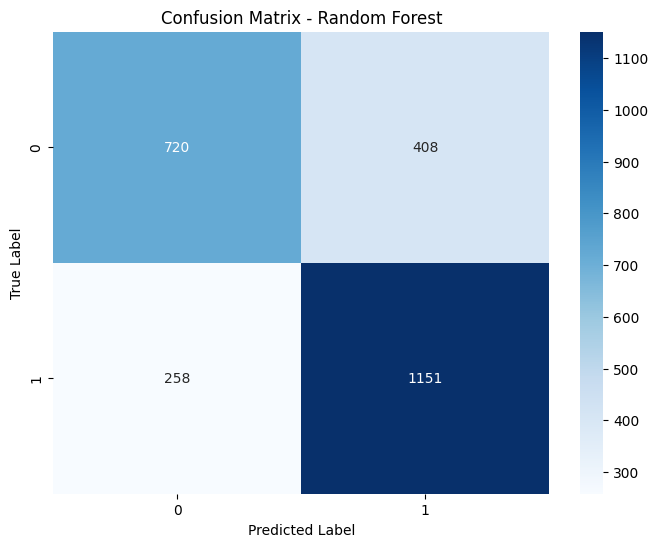

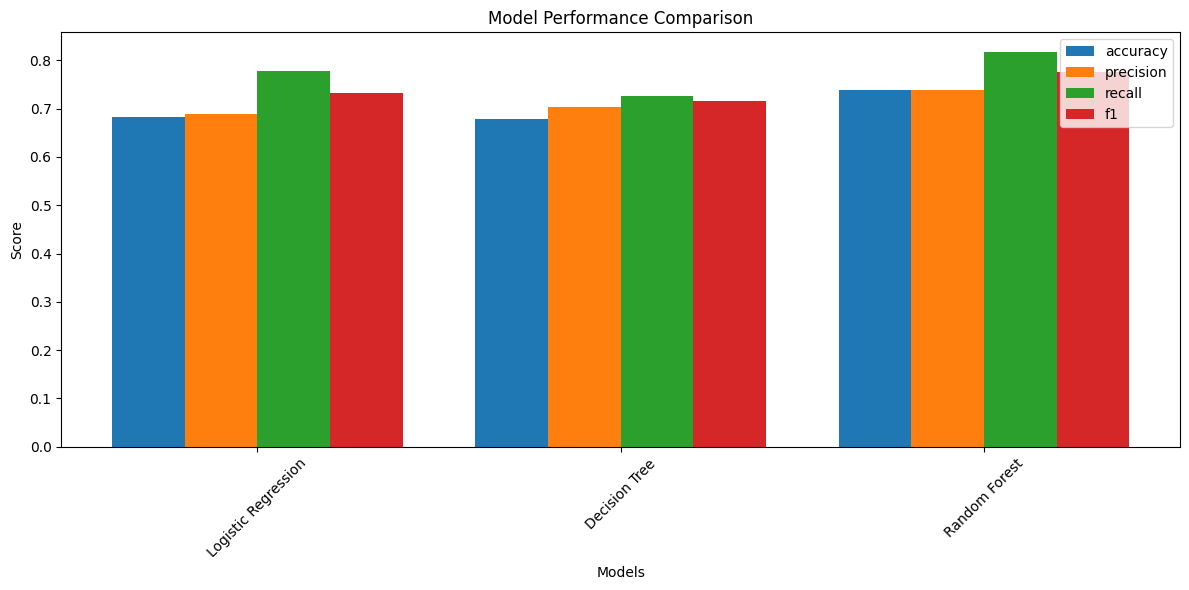


Best Models by Metric:
Best accuracy: Random Forest (0.737)
Best precision: Random Forest (0.738)
Best recall: Random Forest (0.817)
Best f1: Random Forest (0.776)


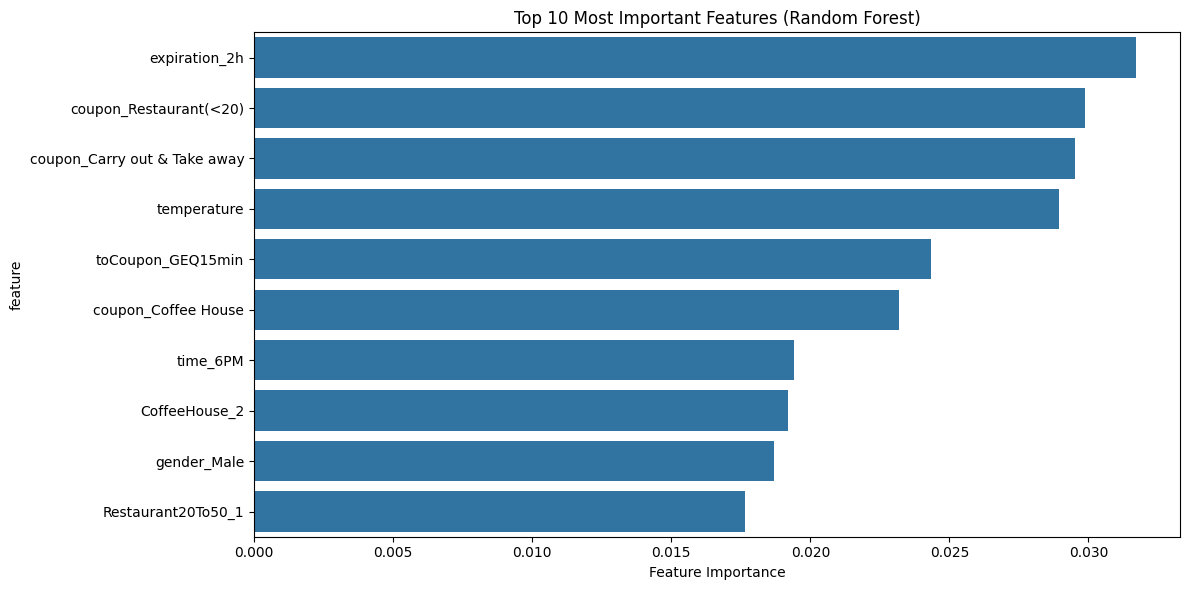


Top 10 Most Important Features:
                         feature  importance
22                 expiration_2h    0.031705
21        coupon_Restaurant(<20)    0.029892
18  coupon_Carry out & Take away    0.029517
0                    temperature    0.028936
3              toCoupon_GEQ15min    0.024351
19           coupon_Coffee House    0.023198
16                      time_6PM    0.019406
77                 CoffeeHouse_2    0.019186
23                   gender_Male    0.018700
88            Restaurant20To50_1    0.017648


In [ ]:
#################################################
# MACHINE LEARNING PIPELINE FOR COUPON PREDICTION
#################################################

# Import necessary ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def train_and_evaluate_models(X, y):
    """
    Main function to train and evaluate multiple ML models
    Args:
        X: Feature matrix
        y: Target variable
    Returns:
        results: Dictionary containing performance metrics
        models: Dictionary containing trained models
    """

    # 1. Split data into training and testing sets
    # Using 80-20 split with fixed random state for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # 2. Initialize our three model types
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),  # Linear model
        'Decision Tree': DecisionTreeClassifier(random_state=42),    # Single tree model
        'Random Forest': RandomForestClassifier(random_state=42)     # Ensemble model
    }

    # Dictionary to store evaluation results
    results = {}

    # 3. Training and evaluation loop
    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train model on training data
        model.fit(X_train, y_train)

        # Generate predictions on test data
        y_pred = model.predict(X_test)

        # Calculate and store all evaluation metrics
        results[name] = {
            'accuracy': accuracy_score(y_test, y_pred),    # Overall accuracy
            'precision': precision_score(y_test, y_pred),  # True positives / predicted positives
            'recall': recall_score(y_test, y_pred),        # True positives / actual positives
            'f1': f1_score(y_test, y_pred)                # Harmonic mean of precision and recall
        }

        # Print detailed classification metrics
        print(f"\n{name} Classification Report:")
        print(classification_report(y_test, y_pred))

        # Visualize confusion matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    return results, models

def plot_model_comparison(results):
    """
    Visualize performance comparison between models
    Args:
        results: Dictionary containing model performance metrics
    """
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    model_names = list(results.keys())

    # Create grouped bar plot
    plt.figure(figsize=(12, 6))
    x = np.arange(len(model_names))
    width = 0.2  # Width of bars

    # Plot bars for each metric
    for i, metric in enumerate(metrics):
        values = [results[model][metric] for model in model_names]
        plt.bar(x + i*width, values, width, label=metric)

    # Customize plot appearance
    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.xticks(x + width*1.5, model_names, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Execute model training and evaluation
results, trained_models = train_and_evaluate_models(X_transformed, y)

# Visualize model comparison
plot_model_comparison(results)

# Identify and print best performing models
print("\nBest Models by Metric:")
metrics = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics:
    best_model = max(results.items(), key=lambda x: x[1][metric])[0]
    score = results[best_model][metric]
    print(f"Best {metric}: {best_model} ({score:.3f})")

# Analyze feature importance using Random Forest
rf_model = trained_models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Visualize top 10 most important features
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# Print detailed feature importance
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string())


WEEK 4: FINE TUNING RANDOM FOREST

Starting GridSearchCV...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

GridSearchCV completed in 33.49 minutes

FINAL REPORT: COUPON RECOMMENDATION SYSTEM

1. DATASET SUMMARY
------------------------------
Total samples: 12684
Number of features: 24
Target distribution:
Y
1    0.568
0    0.432
Name: proportion, dtype: float64

2. MODEL PERFORMANCE COMPARISON
------------------------------

Original Random Forest Performance:
accuracy: 0.737
precision: 0.738
recall: 0.817
f1: 0.776

Tuned Random Forest Performance:
accuracy: 0.741
precision: 0.735
recall: 0.835
f1: 0.782

3. OPTIMAL HYPERPARAMETERS
------------------------------
max_depth: 20
max_features: log2
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 300

4. TOP 10 MOST IMPORTANT FEATURES
------------------------------
                         feature  importance
22                 expiration_2h    0.035192
18  coupon_Carry out & Take away    0.032659
21        coupon_Restaurant(<20)    0.032398
0      

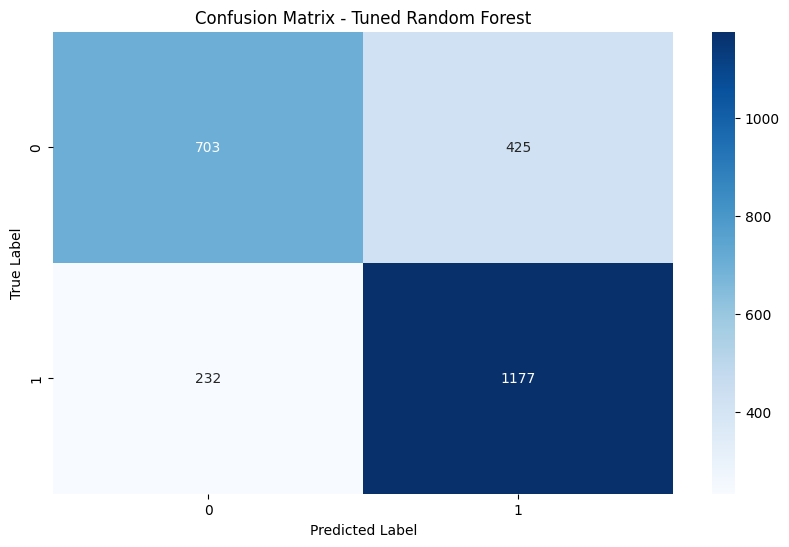

['best_coupon_predictor.joblib']

In [ ]:
# Import additional libraries for model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import time

#################################################
# 1. HYPERPARAMETER TUNING
#################################################
def tune_random_forest(X_train, X_test, y_train, y_test):
    # Define parameter grid for Random Forest
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }

    # Initialize base model
    rf = RandomForestClassifier(random_state=42)

    # Create scoring metrics dictionary
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score)
    }

    # Initialize GridSearchCV
    print("Starting GridSearchCV...")
    start_time = time.time()

    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,
        scoring=scoring,
        refit='f1',
        n_jobs=-1,
        verbose=2
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    print(f"\nGridSearchCV completed in {(time.time() - start_time)/60:.2f} minutes")

    return grid_search

#################################################
# 2. MODEL EVALUATION
#################################################
def evaluate_tuned_model(grid_search, X_test, y_test):
    # Get best model
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate metrics
    results = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }

    return results, best_model

#################################################
# 3. GENERATE FINAL REPORT
#################################################
def generate_final_report(original_results, tuned_results, grid_search, best_model):
    print("\n" + "="*50)
    print("FINAL REPORT: COUPON RECOMMENDATION SYSTEM")
    print("="*50)

    # Dataset Summary
    print("\n1. DATASET SUMMARY")
    print("-"*30)
    print(f"Total samples: {len(X)}")
    print(f"Number of features: {X.shape[1]}")
    print(f"Target distribution:\n{y.value_counts(normalize=True).round(3)}")

    # Model Performance Comparison
    print("\n2. MODEL PERFORMANCE COMPARISON")
    print("-"*30)
    print("\nOriginal Random Forest Performance:")
    for metric, value in original_results['Random Forest'].items():
        print(f"{metric}: {value:.3f}")

    print("\nTuned Random Forest Performance:")
    for metric, value in tuned_results.items():
        print(f"{metric}: {value:.3f}")

    # Best Parameters
    print("\n3. OPTIMAL HYPERPARAMETERS")
    print("-"*30)
    for param, value in grid_search.best_params_.items():
        print(f"{param}: {value}")

    # Feature Importance Analysis
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\n4. TOP 10 MOST IMPORTANT FEATURES")
    print("-"*30)
    print(feature_importance.head(10))

    # Visualize final model performance
    plt.figure(figsize=(10, 6))
    cm = confusion_matrix(y_test, best_model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Tuned Random Forest')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Execute the tuning and evaluation pipeline
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Tune the model
grid_search = tune_random_forest(X_train, X_test, y_train, y_test)

# Evaluate tuned model
tuned_results, best_model = evaluate_tuned_model(grid_search, X_test, y_test)

# Generate final report
generate_final_report(results, tuned_results, grid_search, best_model)

# Save best model
import joblib
joblib.dump(best_model, 'best_coupon_predictor.joblib')
